### The algo we will focus on include:
#### -> Linear Regression
#### -> Classification
#### -> Clustering
#### -> Hidden Markov Models

#### Linear Regression

In [9]:
from __future__ import absolute_import,division,print_function,unicode_literals

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import clear_output
from six.moves import urllib

import tensorflow.compat.v2.feature_column as fc

import tensorflow as tf

##### Data

In [17]:
dftrain = pd.read_csv('https://storage.googleapis.com/tf-datasets/titanic/train.csv') # training data
dfeval = pd.read_csv('https://storage.googleapis.com/tf-datasets/titanic/eval.csv') # testing data
y_train = dftrain.pop('survived')
y_eval = dfeval.pop('survived')
dftrain

,sex,age,n_siblings_spouses,parch,fare,class,deck,embark_town,alone
0,male,22.0,1,0,7.2500,Third,unknown,Southampton,n
1,female,38.0,1,0,71.2833,First,C,Cherbourg,n
2,female,26.0,0,0,7.9250,Third,unknown,Southampton,y
3,female,35.0,1,0,53.1000,First,C,Southampton,n
4,male,28.0,0,0,8.4583,Third,unknown,Queenstown,y
...,...,...,...,...,...,...,...,...,...
622,male,28.0,0,0,10.5000,Second,unknown,Southampton,y
623,male,25.0,0,0,7.0500,Third,unknown,Southampton,y
624,female,19.0,0,0,30.0000,First,B,Southampton,y
625,female,28.0,1,2,23.4500,Third,unknown,Southampton,n


<Axes: >

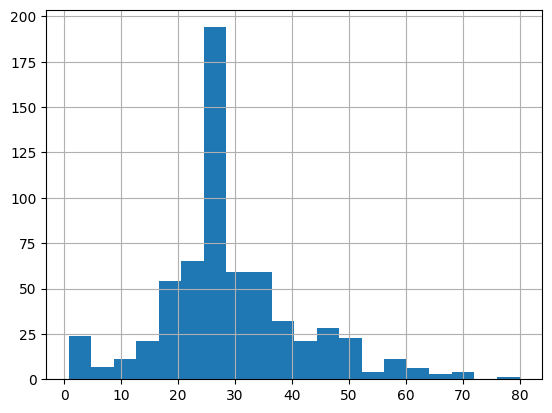

In [18]:
dftrain.age.hist(bins=20)

<Axes: >

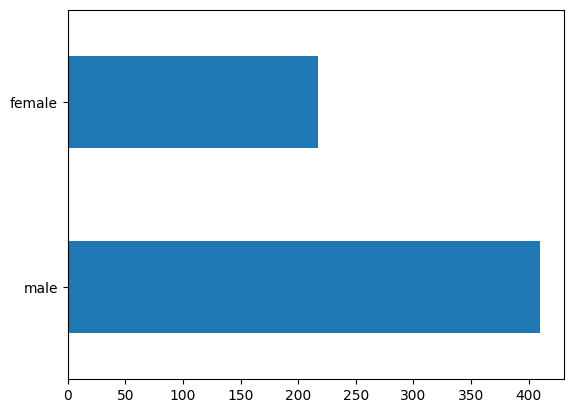

In [19]:
dftrain.sex.value_counts().plot(kind='barh')

<Axes: >

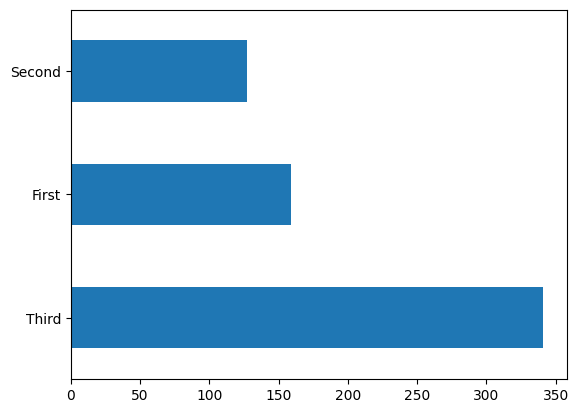

In [22]:
dftrain['class'].value_counts().plot(kind='barh')

Text(0.5, 0, '% survive')

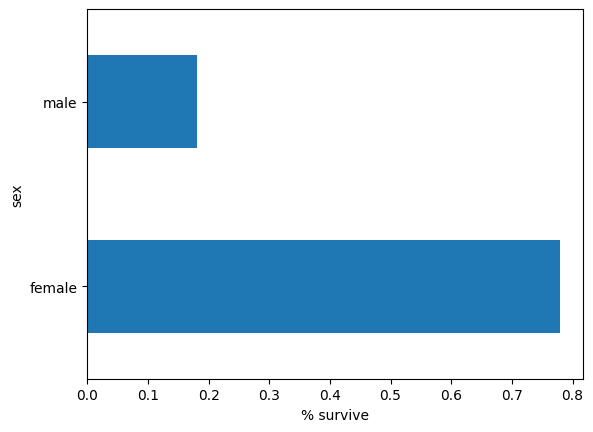

In [25]:
pd.concat([dftrain, y_train], axis=1).groupby('sex').survived.mean().plot(kind='barh').set_xlabel('% survive')

In [30]:
CATEGORICAL_COLUMNS = ['sex', 'n_siblings_spouses', 'parch', 'class', 'deck',
                       'embark_town', 'alone']
NUMERIC_COLUMNS = ['age', 'fare']

feature_columns = []
for feature_name in CATEGORICAL_COLUMNS:
  vocabulary = dftrain[feature_name].unique()  # gets a list of all unique values from given feature column
  feature_columns.append(tf.feature_column.categorical_column_with_vocabulary_list(feature_name, vocabulary))
#tf.feature_column.categorical_column_with_vocabulary_list encodes the categorical columns for us
    
for feature_name in NUMERIC_COLUMNS:
  feature_columns.append(tf.feature_column.numeric_column(feature_name, dtype=tf.float32))

print(feature_columns)

[VocabularyListCategoricalColumn(key='sex', vocabulary_list=('male', 'female'), dtype=tf.string, default_value=-1, num_oov_buckets=0), VocabularyListCategoricalColumn(key='n_siblings_spouses', vocabulary_list=(1, 0, 3, 4, 2, 5, 8), dtype=tf.int64, default_value=-1, num_oov_buckets=0), VocabularyListCategoricalColumn(key='parch', vocabulary_list=(0, 1, 2, 5, 3, 4), dtype=tf.int64, default_value=-1, num_oov_buckets=0), VocabularyListCategoricalColumn(key='class', vocabulary_list=('Third', 'First', 'Second'), dtype=tf.string, default_value=-1, num_oov_buckets=0), VocabularyListCategoricalColumn(key='deck', vocabulary_list=('unknown', 'C', 'G', 'A', 'B', 'D', 'F', 'E'), dtype=tf.string, default_value=-1, num_oov_buckets=0), VocabularyListCategoricalColumn(key='embark_town', vocabulary_list=('Southampton', 'Cherbourg', 'Queenstown', 'unknown'), dtype=tf.string, default_value=-1, num_oov_buckets=0), VocabularyListCategoricalColumn(key='alone', vocabulary_list=('n', 'y'), dtype=tf.string, def

### Training Process

In [31]:
# Load the dataset as batches for large datasets
# We load these batches multiple times and this is called as epochs
# but we cant do this too many times as it will overfit our model

#### Input Function

In [36]:
def make_input_fn(data_df,label_df,num_epochs=10,shuffle=True,batch_size=32):
    def input_function():
        ds = tf.data.Dataset.from_tensor_slices((dict(data_df),label_df)) # create tf.data.Dataset object for the data and labels
        if shuffle:
            ds = ds.shuffle(1000) # randomize order of data
        ds = ds.batch(batch_size).repeat(num_epochs) #split dataset into batches of 32 and repeat for num of epochs
        return ds # return a batch of dataset
    return input_function # return a function object for use

train_input_fn = make_input_fn(dftrain,y_train)
eval_input_fn = make_input_fn(dfeval,y_eval,num_epochs = 1,shuffle=False)

### Creating the Model

In [37]:
linear_est = tf.estimator.LinearClassifier(feature_columns=feature_columns)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': 'C:\\Users\\saige\\AppData\\Local\\Temp\\tmpzno8m_bj', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_checkpoint_save_graph_def': True, '_service': None, '_cluster_spec': ClusterSpec({}), '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


### Training the Model

In [40]:
linear_est.train(train_input_fn) #train
result = linear_est.evaluate(eval_input_fn) # get stats by testing on testing data

clear_output()
print(result['accuracy'])
print(result)

0.77272725
{'accuracy': 0.77272725, 'accuracy_baseline': 0.625, 'auc': 0.83605754, 'auc_precision_recall': 0.78846717, 'average_loss': 0.4710268, 'label/mean': 0.375, 'loss': 0.4578584, 'precision': 0.7241379, 'prediction/mean': 0.34536502, 'recall': 0.6363636, 'global_step': 600}


In [50]:
result = list(linear_est.predict(eval_input_fn))
print(dfeval.loc[4])
print(y_eval.loc[4])
print(result[4]['probabilities'][1])

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\saige\AppData\Local\Temp\tmpzno8m_bj\model.ckpt-600
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
sex                          male
age                          34.0
n_siblings_spouses              0
parch                           0
fare                         13.0
class                      Second
deck                            D
embark_town           Southampton
alone                           y
Name: 4, dtype: object
1
0.21162036
